### Documentación

Problemas interesantes para Aprendizaje por refuerzo
 * Gymnasium: https://gymnasium.farama.org/environments/box2d/

## Instalación

```bash
%pip install gymnasium  
%pip install gymnasium[box2d] 
```

## Acciones adicionales

Pueden ser necesarias *antes* de instalar gymnasium[box2d].

### En macos

```bash
pip uninstall swig  
xcode-select -—install (instala las herramientas de desarrollador si no se tienen ya)  
pip install swig  / sudo port install swig-python  
pip install 'gymnasium[box2d]' # en zsh hay que poner las comillas
```

### En Windows

```bash
pip install swig
```

Si da error al instalar `box2d`, se debe a la falta de la versión correcta de Microsoft C++ Build Tools, que es una dependencia de Box2D.  
Para solucionar este problema, puede seguir los siguientes pasos:
 * `%pip install --upgrade wheel setuptools`
 * Descargar Microsoft C++ Build Tools desde https://visualstudio.microsoft.com/visual-cpp-build-tools/.
 * Dentro del instalador, seleccione la opción "Desarrollo para el escritorio con C++"
 * Reinicie su sesión en Jupyter Notebook o en Visual Studio.
 * Ejecute nuevamente el comando `%pip install gymnasium[box2d]` en la línea de comandos de su notebook.

### En linux (colab)
```bash
pip install swig
```

In [1]:
# prueba lunar lander por humano

import gymnasium as gym

env = gym.make("LunarLander-v3", render_mode="rgb_array")

import numpy as np
import pygame
import gymnasium.utils.play

lunar_lander_keys = {
    (pygame.K_UP,): 2,
    (pygame.K_LEFT,): 1,
    (pygame.K_RIGHT,): 3,
}

try:
    gymnasium.utils.play.play(env, zoom=3, keys_to_action=lunar_lander_keys, noop=0)
except KeyboardInterrupt:
    pass

In [2]:
# prueba lunar lander por agente

import gymnasium as gym

env = gym.make("LunarLander-v3", render_mode="human")


def run(policy: callable):
    # observation, info = env.reset(seed=42)
    observation, info = env.reset()
    ite = 0
    racum = 0
    while True:
        ite += 1
        action = policy(observation)
        observation, reward, terminated, truncated, info = env.step(action)

        racum += reward

        if terminated or truncated:
            r = (racum + 200) / 500
            print(
                f"Episode finished after {ite} timesteps with reward {racum:.2f} (normalized: {r:.2f})"
            )
            return racum

### ¿Cómo contruir el fitness para aplicar genéticos?

 * El módulo MLP ya tiene implementado el perceptrón multicapa. Se construye con MLP(architecture).
 * Architecture es una tupla (entradas, capa1, capa2, ...).
 * La función fitness toma el cromosoma del individuo y lo convierte a pesos del MLP con model.from_chromosome(ch).
 * usa run para N casos (esto da estabilidad) y calcula el refuerzo medio.
 * Este refuerzo medio es el fitness del individuo.

In [3]:
# neuroevolución

# construir modelo
from MLP import MLP

architecture = [8, 6, 4]
model = MLP(architecture)
ch = [-1.6541244408607272, -11.620799536008047, -842.4629876466189, -762.957550978515, 191.10709286601855, -86.54086031041972, 5.708983744043277, 15.267986859223663, 13.447971247828775, -2201.7306384789804, -17.381880332832363, 30.3155009308776, 2.816162280114101, -25.41699344636291, 15.929314253271126, -7.443178477986923, 40.892981998243556, -55.209282050904136, 10.58830172276059, -97.43904130731468, -113.33504887942101, -408.5495751787913, -44.644237982830916, 21.115957503861512, 1.072778812127138, 81.07379229724262, 1.295469279233094, 340.16849575448, -273.52107737280494, 81.01484136828537, -6.756221783489455, 289.74849909737054, -8.819335266940133, 71.40799939512112, 1.0815353097386744, -25.05005862548592, -4.35282746060758, -19.220869410232726, 7.235082216484878, 801.4020743861767, 20.4126310161315, 11.789094294957517, 17.768932106999237, -3.622135170045987, 17.671434373493014, -9.494915979185844, -34.76840965462114, -1.7518355506025052, 1.0218445286688047, -8.749672397184142, -196.1258948020098, 16.79863151787566, -6.358559208598201, 41.51852715654485, 9.609865809548094, 5.314703365498861, -30.23954091859364, -4.34111334841978, -13.263350823824936, -4.6130607875734535, 3.9445954104813348, 104.22594689293778, -11.91495130705942, -3.614444342164317, 2.684270579315232, 0.9616530244262604, 11.039724399032233, -2.6285519675495057, 3.9338473562790544, 23.635226149128517, -82.50858884518121, 11.155198459368304, 7.688315600800451, -136.2589920608169, 5.1448549847718335, 1.4696941303022897, 5.861884013431342, -34.617472088108606, -0.3721876919825129, 0.7077312108367391, 0.6039167866344726, 0.8673063304732613]
model.from_chromosome(ch)

# pasar al modelo los pesos del mejor cromosoma obtenido con neuroevolución

import numpy as np


# definir política
def policy(observation):
    s = model.forward(observation)
    action = np.argmax(s)
    return action

C:\Users\Yago\AppData\Local\Temp\ipykernel_5328\1849653054.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


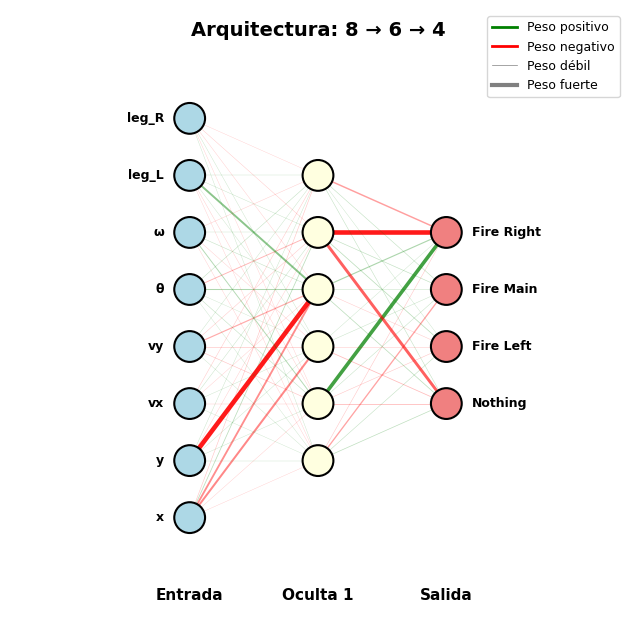

In [4]:
%matplotlib inline
from matplotlib.pyplot import show

fig, ax = model.plot_network()
fig.show()

In [ ]:
N = 10
r = 0
try:
    while True:
        r += run(policy)
except KeyboardInterrupt:
    print(f"Total reward over {N} episodes: {r:.2f}")
    print(f"Average reward over {N} episodes: {r/N:.2f}")

c:\Users\Yago\Desktop\MAADM\4 Aprendizaje por Refuerzo y Técnicas Generativas\rl\MLP.py:37: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-neta))


Episode finished after 126 timesteps with reward 48.20 (normalized: 0.50)
Episode finished after 143 timesteps with reward 33.36 (normalized: 0.47)
Episode finished after 250 timesteps with reward 250.67 (normalized: 0.90)
Episode finished after 149 timesteps with reward 1.74 (normalized: 0.40)
Episode finished after 99 timesteps with reward -11.91 (normalized: 0.38)
Episode finished after 300 timesteps with reward 239.93 (normalized: 0.88)
Episode finished after 237 timesteps with reward 265.97 (normalized: 0.93)
Episode finished after 183 timesteps with reward 266.05 (normalized: 0.93)
Episode finished after 458 timesteps with reward 234.35 (normalized: 0.87)
Total reward over 10 episodes: 1328.36
Average reward over 10 episodes: 132.84


In [ ]:
# para paralelizar el map incluso en windows
# https://github.com/joblib/loky

from loky import get_reusable_executor

executor = get_reusable_executor()

# results = executor.map(fitness, poblacion)

#### ¿No has tenido bastante?

Prueba a controlar el flappy bird https://github.com/markub3327/flappy-bird-gymnasium

pip install flappy-bird-gymnasium

import flappy_bird_gymnasium  
env = gym.make("FlappyBird-v0")

Estado (12 variables):
  * the last pipe's horizontal position
  * the last top pipe's vertical position
  * the last bottom pipe's vertical position
  * the next pipe's horizontal position
  * the next top pipe's vertical position
  * he next bottom pipe's vertical position
  * the next next pipe's horizontal position
  * the next next top pipe's vertical position
  * the next next bottom pipe's vertical position
  * player's vertical position
  * player's vertical velocity
  * player's rotation

  Acciones:
  * 0 -> no hacer nada
  * 1 -> volar